[[70  1]
 [ 1 42]]
0.9824561403508771


Metricas
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114





<Figure size 1500x1500 with 0 Axes>

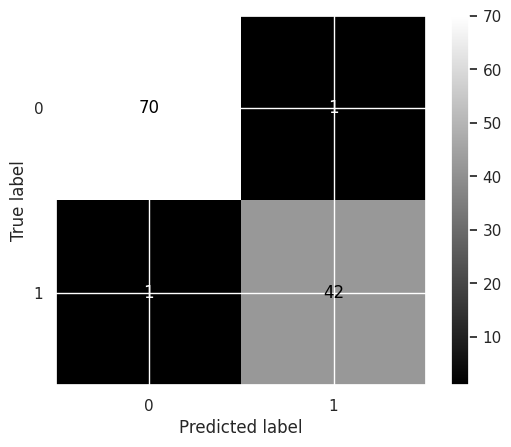

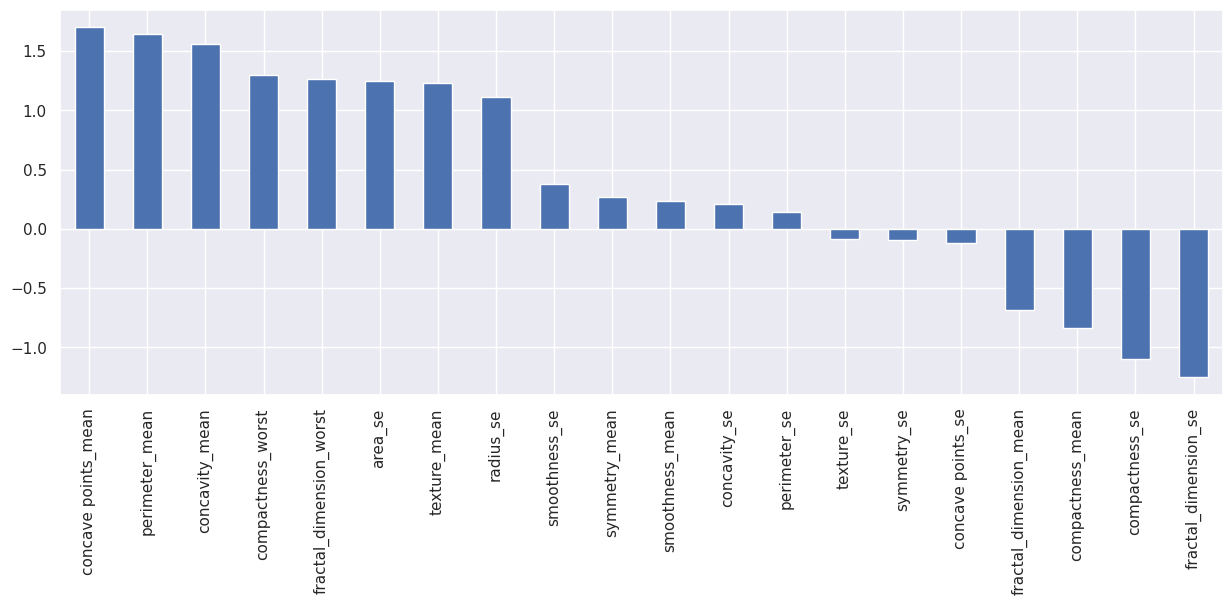

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()


#Lee Datos
df = pd.read_csv('/content/BreastCancerWisconsin.csv')

#Elimina id
df.drop('id',axis=1,inplace=True)

#Elimina NaN
df.drop('Unnamed: 32',axis=1,inplace=True)

#Variable objetivo a numerica
df["diagnosis"].replace(to_replace="M",value=1,inplace=True)
df["diagnosis"].replace(to_replace="B",value=0,inplace=True)

#Elimina correlacionados
df.drop(['radius_mean','area_mean', "area_worst", "radius_worst"], axis=1, inplace=True)


#Elimino ouliers
df.drop(["perimeter_worst","texture_worst","symmetry_worst","concavity_worst","concave points_worst","smoothness_worst"],axis = 1,inplace=True)

# Divide los datos en características (X) y etiquetas (y)
X = df.drop('diagnosis',axis=1)
y = df['diagnosis'].values

#Dividimos el set en datos de entrenmiento y testeo
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size= .2)

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

model=LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print("")
print("")

#Metricas
from sklearn.metrics import classification_report

report = classification_report(y_test,predictions, labels = [0,1])
print("Metricas")
print(report)

print("")
print("")



#matriaz de confucion
fig = plt.figure(figsize=(15,15))
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()
print("")

#coeficientes
weights = pd.Series(model.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

